In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [x[i] for i in range(len(x))]
)

seq = iaa.Sequential([

    iaa.Crop(percent=(0, 0.01)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.25)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0.1, scale=(0.0, 0.00025*255), per_channel=0.1),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-5, 5),
        shear=(-1, 1)
    )
], random_order=True) # apply augmenters in random order

x_64 = seq(images=images)

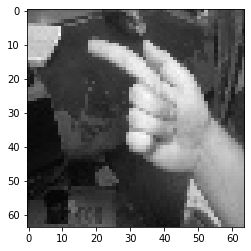

In [ ]:
x_64 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


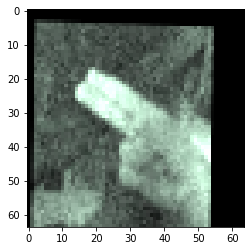

In [ ]:
plt.imshow(x_64[0])
plt.imshow(x_64[8])


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten, Conv2D,MaxPooling2D

from tensorflow.keras import utils
import os
import os, cv2, skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


# ПЛОХОй ДС

In [ ]:
Path_to_train = "/content/drive/My Drive/Sigh/sign_mnist_train/sign_mnist_train.csv"
Path_to_test = "/content/drive/My Drive/Sigh/sign_mnist_test/sign_mnist_test.csv"

In [ ]:
df_train=pd.read_csv(Path_to_train)
df_test=pd.read_csv(Path_to_test)

In [ ]:
df_test[:5][:5]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [ ]:
x_train = df_train.iloc[:, 1:].values
y_train = df_train.iloc[:, :1].values.flatten()

In [ ]:
x_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, :1].values.flatten()

In [ ]:

def display(index):
    plt.imshow(x_train[index].reshape(28, 28) )
    plt.title(str(y_train[index]))
    plt.show()

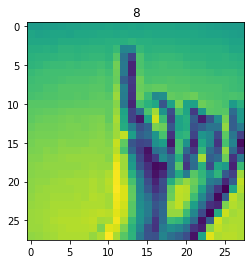

In [ ]:
display(6)

In [ ]:
# Нормализация данных
x_train= x_train.astype("float")
x_train /= 255
x_test= x_test.astype("float")
x_test /= 255

In [ ]:
x_test[1].shape

(784,)

In [ ]:
x_train=x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test=x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
y_train=utils.to_categorical(y_train)
y_test=utils.to_categorical(y_test)

In [ ]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(25,activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=30,validation_split=0.1,shuffle=True)

In [ ]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

NameError: ignored

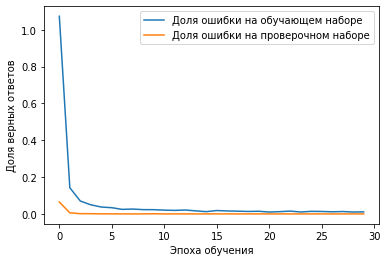

In [ ]:
plt.plot(history.history['loss'], 
         label='Доля ошибки на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Доля ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

NameError: ignored

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

0.9682097044060234

In [ ]:
path_to_image="/content/drive/My Drive/Sigh/photo_2020-03-01_19-33-30.jpg"

In [ ]:
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 

#mode = int(input('mode:')) #Считываем номер преобразования. 
image = Image.open(path_to_image) #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

In [ ]:
import cv2



  
# Откройте изображение.

img_file1 = cv2.imread(path_to_image)
img_file = cv2.resize(img_file1, (64,64))
img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize,3))


In [ ]:
img_file1

array([[[109, 147, 149],
        [ 75, 113, 115],
        [ 86, 124, 129],
        ...,
        [237, 249, 255],
        [237, 249, 255],
        [237, 249, 255]],

       [[105, 143, 145],
        [ 84, 121, 125],
        [ 92, 130, 135],
        ...,
        [237, 249, 255],
        [237, 249, 255],
        [237, 249, 255]],

       [[ 98, 135, 139],
        [ 94, 131, 135],
        [ 98, 136, 141],
        ...,
        [237, 249, 255],
        [237, 249, 255],
        [237, 249, 255]],

       ...,

       [[ 54,  39,  37],
        [ 77,  62,  60],
        [ 61,  46,  44],
        ...,
        [ 88,  96, 103],
        [ 86,  98, 104],
        [ 86, 100, 106]],

       [[ 41,  20,  22],
        [ 51,  30,  32],
        [ 53,  35,  36],
        ...,
        [ 88,  95, 110],
        [ 70,  79,  93],
        [ 74,  87, 101]],

       [[ 50,  28,  30],
        [ 49,  27,  29],
        [ 61,  40,  42],
        ...,
        [ 93,  99, 118],
        [ 75,  85, 103],
        [ 93, 105, 123]]

In [ ]:
ytestt[0]
val_generator_test = val_image_generator.flow(x=Xtestt, y=ytestt, batch_size=batch_size, shuffle=False)

In [ ]:
model1.predict(val_generator_test)

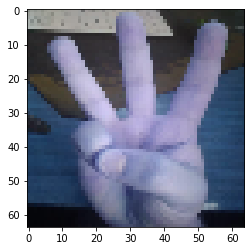

In [ ]:
 plt.imshow(img_arr.reshape(64,64,3))

# **200х200 датасет**

In [ ]:
import zipfile


from google.colab import files

In [ ]:
file = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:09<00:00, 126MB/s]
100% 1.03G/1.03G [00:10<00:00, 110MB/s]


In [ ]:
z = zipfile.ZipFile('/content/asl-alphabet.zip', 'r')
z.extractall() 

In [ ]:
with zipfile.ZipFile("/content/drive/My Drive/Dataset/dataset.zip","r") as zip_ref:
  zip_ref.extractall()

In [ ]:
import string
Alphabet=[x for x in list(string.ascii_uppercase)]

In [ ]:
Alphabet.append("DEL")
Alphabet.append("NOTHING")
Alphabet.append("SPACE")
Alphabet

In [ ]:
Path_to_200_train = "/content/asl_alphabet_train/asl_alphabet_train/"

In [ ]:
path_to_my_set = "/content/drive/My Drive/Dataset/"

In [ ]:
batch_size = 128
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

#train_len = 87000
train_len = 21212
train_dir = path_to_my_set

def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0

    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize,3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
                

    return X,y


In [ ]:
x_t,y_t = get_data(path_to_my_set)
MX_train, MX_test,MY_train,MY_test = train_test_split(x_t,y_t,test_size=0.1)

MY_trainHot=to_categorical(MY_train, num_classes=num_classes)
MY_testHot=to_categorical(MY_test, num_classes=num_classes)

In [ ]:
X_train,y_train = get_data(Path_to_200_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1) 


y_trainHot = to_categorical(y_train, num_classes=num_classes)
y_testHot = to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(MX_train.shape)
print(X_train.shape)

In [ ]:
folder_size = os.path.getsize("/content/drive/My Drive/datafiles/dataY.csv")
folder_size

207842

# SAVE/LOAD dfile

In [ ]:
def save_my_data(x,y,path):
  #dem = x.shape[1]*x.shape[2]*x.shape[3]
  #X_for_save = x.reshape(x.shape[0],dem)
  np.save(path + "dataX_200",x)
  np.save(path + "dataY_200",y)


In [ ]:
X_train[93960]

0 10440
10440 20880
20880 31320
31320 41760
41760 52200
52200 62640
62640 73080
73080 83520
83520 93960
93960 104400


In [ ]:
save_full_data(newX,newY)

In [ ]:
def save_full_data(x,y):
  path = "/content/drive/My Drive/datafiles/"
  num =1
  shag = int(x.shape[0]/10)
  srez =0
  srez1 = 0
  for i in range(10):
    srez +=shag
    newx = x[srez1:srez]
    newy = y[srez1:srez]
    np.save(path + str(i) +"X64", newx)
    np.save(path + str(i) +"Y64", newy)
    srez1 +=shag
    


In [ ]:
def load_all_data():
  path = "/content/drive/My Drive/datafiles/"
  zX = np.load(path+str(0)+"X64.npy")
  zY = np.load(path+str(0)+"Y64.npy")
  for i in range(1,10):
    x = np.load(path+str(i)+"X64.npy")
    y = np.load(path+str(i)+"Y64.npy")
    print(i)
    zX = np.concatenate((zX,x))
    zY = np.concatenate((zY,y))
  return zX,zY

In [ ]:
zX,zY = load_all_data()

In [ ]:
zY.shape

In [ ]:
x , y =load_all_data()

In [ ]:
def load_my_data(path,check):
  if check == 1:
    YX_train = np.load(path + "dataY_200.npy")
    MX_train = np.load(path+"dataX_200.npy" )
  else:
    YX_train = np.load(path + "dataY_M.npy")
    MX_train = np.load(path+"dataX_M.npy" )
  
  return MX_train, YX_train

In [ ]:
data_path = "/content/drive/My Drive/datafiles/"

In [ ]:
save_my_data(x_t,y_t,data_path)

In [ ]:
save_my_data(X_train,y_train,data_path)

In [ ]:
MX_train,MY_trainHot= load_my_data(data_path,0)
My_trainHot=to_categorical(MY_trainHot, num_classes=num_classes)

In [ ]:
X_train, y_trainHot = load_my_data(data_path,1)

In [ ]:
X_train = np.concatenate((newX, X_train))
X_test = np.concatenate((newX_test,X_test))
y_trainHot = np.concatenate((newY,y_trainHot))
y_testHot = np.concatenate((newY_test,y_testHot))

In [ ]:
X_train.shape

NameError: ignored

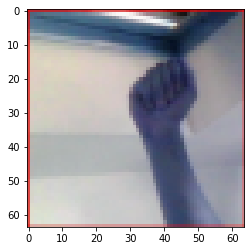

In [ ]:
plt.imshow(X_train[45000])

In [ ]:
def balanced_sample_maker(X, y, sample_size, random_seed=None):
    """ return a balanced data set by sampling all classes with sample_size 
        current version is developed on assumption that the positive
        class is the minority.

    Parameters:
    ===========
    X: {numpy.ndarrray}
    y: {numpy.ndarray}
    """
    uniq_levels = np.unique(y)
    uniq_counts = {level: sum(y == level) for level in uniq_levels}

    if not random_seed is None:
        np.random.seed(random_seed)

    # find observation index of each class levels
    groupby_levels = {}
    for ii, level in enumerate(uniq_levels):
        obs_idx = [idx for idx, val in enumerate(y) if val == level]
        groupby_levels[level] = obs_idx
    # oversampling on observations of each label
    balanced_copy_idx = []
    for gb_level, gb_idx in iter(groupby_levels.items()):
        over_sample_idx = np.random.choice(gb_idx, size=sample_size, replace=True).tolist()
        balanced_copy_idx+=over_sample_idx
    np.random.shuffle(balanced_copy_idx)

    return (X[balanced_copy_idx, :], y[balanced_copy_idx], balanced_copy_idx)

In [ ]:
newX , newY , BCI = balanced_sample_maker(MX_train,MY_train,1000)

In [ ]:
NewY=to_categorical(newY, num_classes=num_classes)

In [ ]:
newX,  newX_test, newY, newY_test = train_test_split(newX,NewY,test_size=0.1)

ValueError: ignored

In [ ]:
newX.shape

(26100, 64, 64, 3)

# Аугментация

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True
)

val_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_generator = train_image_generator.flow(x=X_train, y=y_trainHot, batch_size=batch_size, shuffle=True)
val_generator = val_image_generator.flow(x=X_test, y=y_testHot, batch_size=batch_size, shuffle=False)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

# Модель на генераторе

In [ ]:
modelGen = Sequential()
modelGen.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,3) ))
modelGen.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
modelGen.add(MaxPooling2D(pool_size=(2,2)))
modelGen.add(Dropout(0.25))
modelGen.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,3) ))
modelGen.add(Conv2D(64,kernel_size=(3,3), activation = 'relu'))
modelGen.add(MaxPooling2D(pool_size=(2,2)))
modelGen.add(Dropout(0.25))
modelGen.add(Flatten())
modelGen.add(Dense(512,activation="relu"))
modelGen.add(Dropout(0.5))

modelGen.add(Dense(29,activation="softmax"))

In [ ]:
modelGen.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(modelGen.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)       

In [ ]:
modelGen.fit(train_generator,
          steps_per_epoch=len(X_train) / 128, epochs=35)

In [ ]:
modelGen.fit_generator(train_generator, epochs=30, validation_data=val_generator,
    steps_per_epoch=train_generator.__len__(),
    validation_steps=val_generator.__len__()
)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf

from tensorflow import keras

print(tf.version.VERSION)
modelGen.save('/content/drive/My Drive/Sigh/my_modelGEN2.h5')

2.2.0


In [ ]:
img_1 = cv2.imread("/content/asl_alphabet_test/asl_alphabet_test/G_test.jpg")
img_1 = skimage.transform.resize(img_1, (64, 64, 3))
img_arr = np.asarray(img_1).reshape((-1, imageSize, imageSize,3))

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    horizontal_flip=True)
datagen.fit(img_arr)

In [ ]:
np.argmax(modelGen.predict(img_arr))

27

# **Построение модели на 200х200**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), activation = 'relu', input_shape=(64, 64 ,3) ))
model.add(Conv2D(32,kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(5,5), activation = 'relu', input_shape=(64, 64 ,3) ))
model.add(Conv2D(64,kernel_size=(5,5), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(29,activation="softmax"))

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,3) ))
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(29,activation="softmax"))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 56, 56, 32)        25632     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 10, 10, 64)      

In [ ]:
X_train.shape

NameError: ignored

In [ ]:

history1=model.fit(zX,zY,batch_size=128,epochs=10,validation_split=0.3, shuffle=True)

Epoch 1/10
159/159 [==============================] - 4s 24ms/step - loss: 2.9833 - accuracy: 0.1589 - val_loss: 2.3069 - val_accuracy: 0.3390
Epoch 2/10
159/159 [==============================] - 4s 23ms/step - loss: 2.1737 - accuracy: 0.3541 - val_loss: 1.6106 - val_accuracy: 0.5368
Epoch 3/10
159/159 [==============================] - 4s 23ms/step - loss: 1.6748 - accuracy: 0.4870 - val_loss: 1.2528 - val_accuracy: 0.6454
Epoch 4/10
159/159 [==============================] - 4s 23ms/step - loss: 1.3548 - accuracy: 0.5774 - val_loss: 0.9438 - val_accuracy: 0.7467
Epoch 5/10
159/159 [==============================] - 4s 23ms/step - loss: 1.1209 - accuracy: 0.6477 - val_loss: 0.7563 - val_accuracy: 0.7997
Epoch 6/10
159/159 [==============================] - 4s 23ms/step - loss: 0.9485 - accuracy: 0.7003 - val_loss: 0.5938 - val_accuracy: 0.8391
Epoch 7/10
159/159 [==============================] - 4s 23ms/step - loss: 0.8117 - accuracy: 0.7415 - val_loss: 0.5077 - val_accuracy: 0.8643

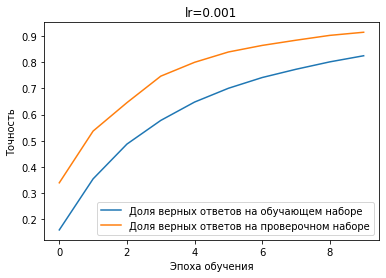

In [ ]:
plt.plot(history1.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.title('lr=0.001')
plt.ylabel('Точность')
plt.legend()
plt.show()

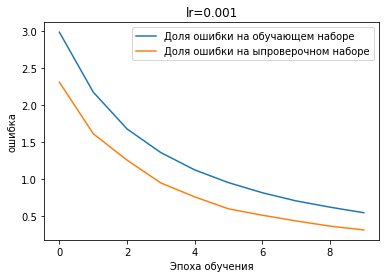

In [ ]:
plt.plot(history1.history['loss'], 
         label='Доля ошибки на обучающем наборе')
plt.plot(history1.history['val_loss'], 
         label='Доля ошибки на ыпроверочном наборе')
plt.xlabel('Эпоха обучения')
plt.title('lr=0.001')
plt.ylabel('ошибка')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_train,y_trainHot)

2447/2447 [==============================] - 21s 8ms/step - loss: 9.5660 - accuracy: 0.1391


[9.56602668762207, 0.13911877572536469]

In [ ]:
s = "1"
s = int(s)
type(s)

int

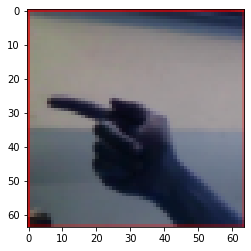

In [ ]:
 plt.imshow(img_1.reshape(64,64,3))


In [ ]:

np.argmax(model.predict(img_1))


In [ ]:
!pip install -q pyyaml h5py

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf

from tensorflow import keras

print(tf.version.VERSION)
model.save('/content/drive/My Drive/Sigh/my_model_fullDATA.h5')


2.2.0


In [ ]:
model.save('/content/drive/My Drive/Sigh/my_model_my_data.h5')